In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("train.csv", parse_dates=["Dates"])

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test = pd.read_csv("test.csv", parse_dates=["Dates"])

print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing

In [4]:
train["Address-type-ST"] = train["Address"].str[-2:] == "ST"
train["Address-type-AV"] = train["Address"].str[-2:] == "AV"
train["Address-type-BL"] = train["Address"].str[-2:] == "BL"
train["Address-type-DR"] = train["Address"].str[-2:] == "DR"
train["Address-type-WY"] = train["Address"].str[-2:] == "WY"
train["Address-type-RD"] = train["Address"].str[-2:] == "RD"
train["Address-type-CT"] = train["Address"].str[-2:] == "CT"
train["Address-type-HY"] = train["Address"].str[-2:] == "HY"
train["Address-type-PZ"] = train["Address"].str[-2:] == "PZ"
train["Address-type-LN"] = train["Address"].str[-2:] == "LN"
train["Address-type-TR"] = train["Address"].str[-2:] == "TR"
train["Address-type-PL"] = train["Address"].str[-2:] == "PL"





In [5]:
test["Address-type-ST"] = test["Address"].str[-2:] == "ST"
test["Address-type-AV"] = test["Address"].str[-2:] == "AV"
test["Address-type-BL"] = test["Address"].str[-2:] == "BL"
test["Address-type-DR"] = test["Address"].str[-2:] == "DR"
test["Address-type-WY"] = test["Address"].str[-2:] == "WY"
test["Address-type-RD"] = test["Address"].str[-2:] == "RD"
test["Address-type-CT"] = test["Address"].str[-2:] == "CT"
test["Address-type-HY"] = test["Address"].str[-2:] == "HY"
test["Address-type-PZ"] = test["Address"].str[-2:] == "PZ"
test["Address-type-LN"] = test["Address"].str[-2:] == "LN"
test["Address-type-TR"] = test["Address"].str[-2:] == "TR"
test["Address-type-PL"] = test["Address"].str[-2:] == "PL"


In [6]:
Address_type_list = ["Address-type-ST","Address-type-AV","Address-type-BL","Address-type-DR",
                     "Address-type-WY","Address-type-RD", "Address-type-CT","Address-type-HY",
                     "Address-type-PZ", "Address-type-LN", "Address-type-TR", "Address-type-PL"]

### Parse Dates

In [7]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 27)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [8]:
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 25)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### Encode PdDistrict

In [9]:
pd_district_list = train["PdDistrict"].unique()

pd_district_list

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [10]:
pd_district_columns = []

for pd_district in pd_district_list:
    new_column = "PdDistrict_{0}".format(pd_district)
    train[new_column] = train["PdDistrict"] == pd_district
    
    pd_district_columns.append(new_column)

print(train.shape)
train[["PdDistrict"] + pd_district_columns].head()

(878049, 37)


,PdDistrict,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN
0,NORTHERN,True,False,False,False,False,False,False,False,False,False
1,NORTHERN,True,False,False,False,False,False,False,False,False,False
2,NORTHERN,True,False,False,False,False,False,False,False,False,False
3,NORTHERN,True,False,False,False,False,False,False,False,False,False
4,PARK,False,True,False,False,False,False,False,False,False,False


In [11]:
for pd_district in pd_district_list:
    new_column = "PdDistrict_{0}".format(pd_district)
    test[new_column] = test["PdDistrict"] == pd_district

print(test.shape)
test[["PdDistrict"] + pd_district_columns].head()

(884262, 35)


,PdDistrict,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN
0,BAYVIEW,False,False,False,True,False,False,False,False,False,False
1,BAYVIEW,False,False,False,True,False,False,False,False,False,False
2,NORTHERN,True,False,False,False,False,False,False,False,False,False
3,INGLESIDE,False,False,True,False,False,False,False,False,False,False
4,INGLESIDE,False,False,True,False,False,False,False,False,False,False


In [12]:
# train_pd_district = pd.get_dummies(train["PdDistrict"], prefix="PdDistrict")

# # concat == concatenate
# train = pd.concat([train, train_pd_district], axis=1)

# print(train.shape)
# train.head()

### Dates-minute

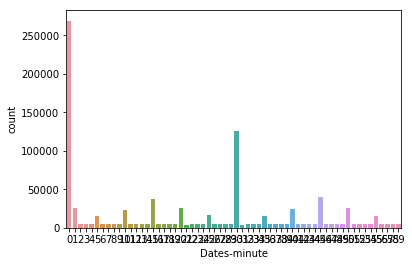

In [16]:
%matplotlib inline
import seaborn as sns

sns.countplot(data=train, x="Dates-minute")

In [13]:
import numpy as np

train["Dates-minute-abs"] = np.abs(train["Dates-minute"] - 30)

print(train.shape)
train[["Dates-minute", "Dates-minute-abs"]].head()

(878049, 38)


,Dates-minute,Dates-minute-abs
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0


In [14]:
test["Dates-minute-abs"] = np.abs(test["Dates-minute"] - 30)

print(test.shape)
test[["Dates-minute", "Dates-minute-abs"]].head()

(884262, 36)


,Dates-minute,Dates-minute-abs
0,59,29
1,51,21
2,50,20
3,45,15
4,45,15


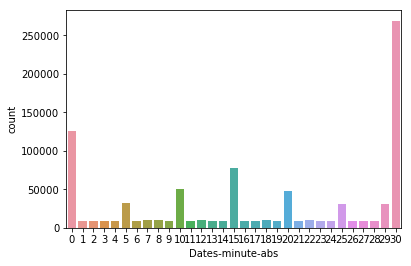

In [17]:
sns.countplot(data=train, x="Dates-minute-abs")

### AddressType

In [18]:
train["Crossroad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Crossroad"]].head()

(878049, 39)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [19]:
test["Crossroad"] = test["Address"].str.contains("/")

print(test.shape)
test[["Address", "Crossroad"]].head()
test["Crossroad"].value_counts()

(884262, 37)


False    622104
True     262158
Name: Crossroad, dtype: int64

In [20]:
train["X+Y"] = train["X"] + train["Y"]
train["X+Y"].value_counts().head()


-84.627984    26354
-84.655438     4449
-84.650053     3891
-84.623444     3170
-84.654622     3006
Name: X+Y, dtype: int64

In [21]:
test["X+Y"] = test["X"] + test["Y"]
test["X+Y"].value_counts()

-84.627984    26831
-84.655438     4267
-84.650053     4000
-84.623444     3295
-84.654622     3239
-84.621458     2524
-84.626467     2475
-84.693664     2239
-84.657709     2100
-84.620679     2093
-84.747119     1978
-84.726596     1641
-84.634050     1608
-84.629320     1558
-84.627052     1545
-84.628063     1541
-84.627554     1524
-84.657995     1510
-84.631263     1444
-84.622751     1442
-84.628912     1437
-84.632038     1360
-84.643811     1250
-84.626965     1240
-84.634478     1233
-84.632007     1200
-84.555895     1188
-84.649447     1162
-84.627918     1142
-84.602339     1138
              ...  
-84.731724        1
-84.672558        1
-84.711211        1
-84.665145        1
-84.720772        1
-84.666709        1
-84.708186        1
-84.713108        1
-84.741948        1
-84.661148        1
-84.733782        1
-84.638183        1
-84.684948        1
-84.652632        1
-84.712567        1
-84.725975        1
-84.719916        1
-84.730357        1
-84.614588        1


In [60]:
test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,Address-type-DR,Address-type-WY,Address-type-RD,Address-type-CT,Address-type-HY,Address-type-PZ,Address-type-LN,Address-type-TR,Address-type-PL,X+Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.664537
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.659091
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.633790
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.715982
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.715982
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.745852
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.686266
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.672902
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.653535
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,2015,5,10,...,False,False,False,False,False,False,False,False,False,-84.615048


## Score

In [22]:
feature_names = ["X+Y", "Dates-hour", "Dates-minute-abs", "Crossroad"]
feature_names = feature_names + pd_district_columns + Address_type_list
feature_names

['X+Y',
 'Dates-hour',
 'Dates-minute-abs',
 'Crossroad',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_INGLESIDE',
 'PdDistrict_BAYVIEW',
 'PdDistrict_RICHMOND',
 'PdDistrict_CENTRAL',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'PdDistrict_MISSION',
 'PdDistrict_SOUTHERN',
 'Address-type-ST',
 'Address-type-AV',
 'Address-type-BL',
 'Address-type-DR',
 'Address-type-WY',
 'Address-type-RD',
 'Address-type-CT',
 'Address-type-HY',
 'Address-type-PZ',
 'Address-type-LN',
 'Address-type-TR',
 'Address-type-PL']

In [23]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(878049, 26)


,X+Y,Dates-hour,Dates-minute-abs,Crossroad,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,...,Address-type-BL,Address-type-DR,Address-type-WY,Address-type-RD,Address-type-CT,Address-type-HY,Address-type-PZ,Address-type-LN,Address-type-TR,Address-type-PL
0,-84.651293,23,23,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-84.651293,23,23,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-84.623949,23,3,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-84.626123,23,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-84.667196,23,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(884262, 26)


,X+Y,Dates-hour,Dates-minute-abs,Crossroad,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,PdDistrict_BAYVIEW,PdDistrict_RICHMOND,PdDistrict_CENTRAL,...,Address-type-BL,Address-type-DR,Address-type-WY,Address-type-RD,Address-type-CT,Address-type-HY,Address-type-PZ,Address-type-LN,Address-type-TR,Address-type-PL
0,-84.664537,23,29,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-84.659091,23,21,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-84.633790,23,20,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-84.715982,23,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-84.715982,23,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
label_name = "Category"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### XGBoost

In [26]:
import xgboost as xgb

# model = xgb.XGBClassifier(n_estimators=15,
#                           nthread=-1,
#                           seed=37)

# https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

model = xgb.XGBClassifier(n_estimators=15,
                          max_depth=6,
                          learning_rate=1.0,
                          max_delta_step=1,
                          nthread=-1,
                          seed=33)

model

/Users/keonpark/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1.0, max_delta_step=1, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=15, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=33, silent=True, subsample=1)

In [27]:
from sklearn.model_selection import cross_val_score

%time score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_log_loss').mean()

print("Score = {0:.5f}".format(score))

CPU times: user 46min 33s, sys: 13.8 s, total: 46min 47s
Wall time: 47min 8s
Score = -2.35126


In [28]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1.0, max_delta_step=1, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=15, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=33, silent=True, subsample=1)

In [29]:
predictions = model.predict_proba(X_test)

print(predictions.shape)
predictions[0]

(884262, 39)


array([  1.67548694e-02,   1.02136254e-01,   4.74117878e-05,
         2.82943808e-03,   2.41877027e-02,   2.49593589e-03,
         6.41803490e-03,   1.94824934e-02,   3.57284653e-03,
         1.39427755e-03,   1.75935638e-04,   7.03451980e-04,
         2.82220240e-03,   1.02257803e-02,   3.12313641e-05,
         6.18049549e-03,   8.14880133e-02,   3.68436286e-03,
         2.53446400e-04,   7.08175823e-02,   1.13158911e-01,
         1.57044768e-01,   5.25038959e-05,   1.72658489e-04,
         3.64447269e-03,   2.52390131e-02,   2.08789809e-03,
         1.98219325e-02,   3.67208919e-03,   2.09645470e-04,
         6.08084444e-03,   6.96182076e-04,   7.18911439e-02,
         8.91065501e-05,   4.31649946e-03,   5.87565042e-02,
         3.49177793e-02,   2.52842586e-02,   1.17162004e-01], dtype=float32)

## Submit

In [30]:
submit = pd.read_csv("sampleSubmission.csv", index_col="Id")

print(submit.shape)
submit.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
for i, column in enumerate(submit.columns):
    submit[column] = predictions[:, i]

print(submit.shape)
submit.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.016755,0.102136,0.000047,0.002829,0.024188,0.002496,0.006418,0.019482,0.003573,0.001394,...,0.000210,0.006081,0.000696,0.071891,0.000089,0.004316,0.058757,0.034918,0.025284,0.117162
1,0.005137,0.036329,0.000020,0.000159,0.000563,0.001557,0.009748,0.068374,0.008741,0.000055,...,0.000051,0.004366,0.000022,0.022621,0.000201,0.000615,0.015042,0.029019,0.098243,0.029496
2,0.002626,0.162949,0.000158,0.000207,0.031392,0.004545,0.002183,0.075496,0.006664,0.000193,...,0.000025,0.013693,0.000155,0.040536,0.000013,0.010352,0.054802,0.024747,0.058846,0.010902
3,0.002165,0.194520,0.000074,0.000703,0.031877,0.008166,0.002217,0.024490,0.004982,0.000262,...,0.000058,0.006480,0.000574,0.047236,0.000012,0.006915,0.090948,0.112206,0.023325,0.012318
4,0.002165,0.194520,0.000074,0.000703,0.031877,0.008166,0.002217,0.024490,0.004982,0.000262,...,0.000058,0.006480,0.000574,0.047236,0.000012,0.006915,0.090948,0.112206,0.023325,0.012318


In [32]:
submit.to_csv("baseline-script.csv")